In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import wasserstein_distance
from sklearn.manifold import TSNE
# import umap
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
sns.set()

In [21]:
with open('st_data_cgid.pkl', 'rb') as f:
    st_data_cgid = pickle.load(f)

with open('st_data_quiver.pkl', 'rb') as f:
    st_data_quiver = pickle.load(f)

In [22]:
st_data = st_data_cgid.copy()
# st_data = st_data_quiver.copy()

st_hist_data = [np.concatenate(st_data[unit_idx]) for unit_idx in range(len(st_data))]
st_hist_data = [st_hist_data[unit_idx] for unit_idx in range(len(st_hist_data)) if len(st_hist_data[unit_idx]) > 0]
num_units = len(st_hist_data)

median_data = [np.median(st_hist_data[unit_idx]) for unit_idx in range(num_units)]
count_data = [len(st_hist_data[unit_idx]) for unit_idx in range(num_units)]

num_units = len(st_hist_data)

dist_mat = np.zeros((num_units, num_units))
for unit_idx1 in range(num_units):
    for unit_idx2 in range(unit_idx1, num_units):
        dist = wasserstein_distance(st_hist_data[unit_idx1], st_hist_data[unit_idx2])
        dist_mat[unit_idx1, unit_idx2] = dist
        dist_mat[unit_idx2, unit_idx1] = dist




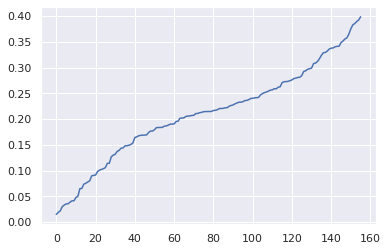

In [23]:
plt.plot(np.sort(median_data))

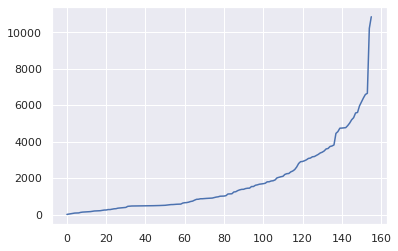

In [24]:
plt.plot(np.sort(count_data))

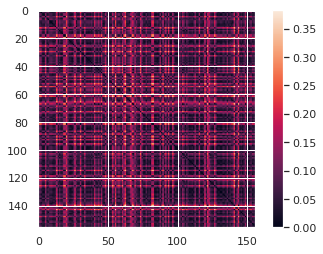

In [25]:
plt.imshow(dist_mat)
plt.colorbar()

In [19]:
model = TSNE(n_components=2, perplexity=10, metric='precomputed',)
kmeans = KMeans(n_clusters=4)

points = model.fit_transform(dist_mat)
points_class = kmeans.fit_predict(points)

df_dict = {'TSNE1': points[:,0], 'TSNE2': points[:,1],
           'cluster': points_class.astype(str),
           'median': median_data, 'count': count_data}

df = pd.DataFrame(df_dict)

/home/ntolley/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/ntolley/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


ValueError: The parameter init="pca" cannot be used with metric="precomputed".

Text(0, 0.5, 'TSNE2')

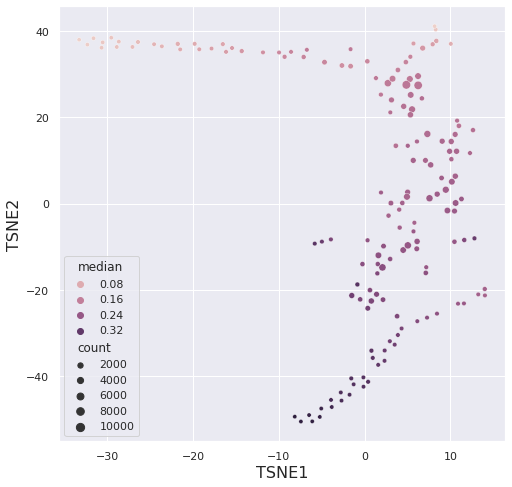

In [18]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='TSNE1', y='TSNE2', hue='median', size='count')
plt.xlabel('TSNE1', fontsize=16)
plt.ylabel('TSNE2', fontsize=16)

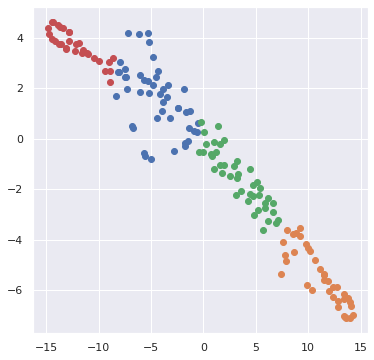

In [19]:
plt.figure(figsize=(6,6))
for class_idx in range(5):
    plot_points = points[points_class == class_idx]
    plt.scatter(plot_points[:,0], plot_points[:,1], color=f'C{class_idx}')

In [52]:
points_class

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 3, 1, 1, 0, 2, 2, 0, 1, 0, 3, 1,
       1, 2, 0, 2, 2, 1, 3, 2, 3, 3, 1, 2, 0, 2, 3, 1, 3, 0, 3, 0, 0, 0,
       1, 3, 3, 0, 2, 0, 3, 1, 0, 2, 0, 1, 3, 0, 1, 0, 0, 2, 1, 2, 2, 1,
       2, 1, 2, 2, 2, 1, 0, 0, 3, 0, 2, 1, 2, 1, 0, 1, 0, 1, 0, 3, 0],
      dtype=int32)

IndexError: list index out of range

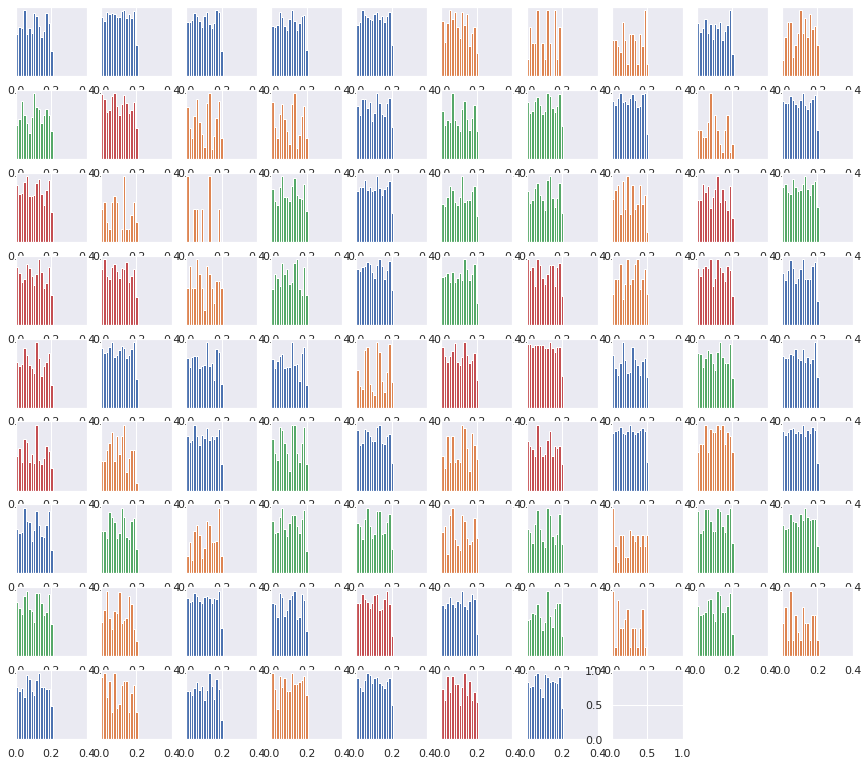

In [53]:
bins = np.linspace(0, 0.4, 30)
plt.figure(figsize=(15,15))
for unit_idx in range(0,100):
    plt.subplot(10,10,unit_idx+1)
    plt.hist(st_hist_data[unit_idx], bins=bins, color=f'C{points_class[unit_idx]}')
    plt.xlim(0, 0.4)
    plt.yticks([])
plt.tight_layout()